In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

import warnings
warnings.filterwarnings('ignore') # supresses errors

from nltk import FreqDist

from wordcloud import WordCloud
import ast # used for converting column values to lists post-import from csv


pd.set_option("display.max_columns", None)


In [2]:
df = pd.read_csv('data/foodcom_recipes_with_classification.csv')
df.head()

,id,name,description,ingredients,ingredients_raw_str,serving_size,servings,steps,tags,search_terms
0,96313,Grilled Garlic Cheese Grits,"We love grits, this is another good way to ser...","['water', 'grits', 'salt', 'cheddar cheese', '...","[""4 cups water"",""1 cup uncooked old f...",1 (155 g),8,"['I a sauce pan, bring water to a boil; slowly...","['time-to-make', 'course', 'main-ingredient', ...","{'diabetic', 'low-calorie', 'vegetarian', 'low..."
1,232037,Simple Shrimp and Andouille Jambalaya,"Simple, easy and very tasty for when you are i...","['onion', 'red bell pepper', 'garlic cloves', ...","[""1 medium onion, chopped coarse "",""1 m...",1 (366 g),4,"['In a food processor, pulse the onion, red pe...","['60-minutes-or-less', 'time-to-make', 'course...","{'dinner', 'shrimp'}"
2,41090,black-and-white bean salad,NaN,"['white beans', 'canned black beans', 'tomatoe...","[""1 cup canned white beans, rinsed and dra...",1 (807 g),1,"['In a large bowl, combine beans, tomato, onio...","['15-minutes-or-less', 'time-to-make', 'course...","{'vegetarian', 'salad', 'side', 'dinner', 'veg..."
3,60656,Crock Pot Italian Zucchini,This is a good recipe for weight watchers. It ...,"['zucchini', 'yellow squash', 'diced tomatoes'...","[""2 zucchini, sliced "",""2 small yel...",1 (244 g),4,['Put all ingredients in the crock pot and coo...,"['weeknight', 'time-to-make', 'course', 'main-...","{'side', 'vegetarian', 'italian'}"
4,232047,Beef Stew With Dried Cherries,This is a fabulous stew that came from one of ...,"['beef stew meat', 'flour', 'salt', 'allspice'...","[""3 lbs beef stew meat"",""3 tablespoons ...",1 (358 g),8,"['Preheat oven to 350°F.', ""Cut beef into 1 in...","['time-to-make', 'course', 'main-ingredient', ...",{'dinner'}


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494963 entries, 0 to 494962
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   id                   494963 non-null  int64 
 1   name                 494963 non-null  object
 2   description          485365 non-null  object
 3   ingredients          494963 non-null  object
 4   ingredients_raw_str  494963 non-null  object
 5   serving_size         494963 non-null  object
 6   servings             494963 non-null  int64 
 7   steps                494963 non-null  object
 8   tags                 494963 non-null  object
 9   search_terms         494963 non-null  object
dtypes: int64(2), object(8)
memory usage: 37.8+ MB


In [4]:
# drop columns with nulls
df = df.dropna(subset=['description'])

In [6]:
# confirming nulls removed 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 485365 entries, 0 to 494962
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   id                   485365 non-null  int64 
 1   name                 485365 non-null  object
 2   description          485365 non-null  object
 3   ingredients          485365 non-null  object
 4   ingredients_raw_str  485365 non-null  object
 5   serving_size         485365 non-null  object
 6   servings             485365 non-null  int64 
 7   steps                485365 non-null  object
 8   tags                 485365 non-null  object
 9   search_terms         485365 non-null  object
dtypes: int64(2), object(8)
memory usage: 40.7+ MB


In [7]:
# removing napkin folding instructions from the dataframe

df = df[df['ingredients'] != "['paper', 'cloth']"]

In [8]:
df_no_ingredients = df[df['ingredients'] == "[]"]
df_no_ingredients.head()

,id,name,description,ingredients,ingredients_raw_str,serving_size,servings,steps,tags,search_terms
117459,405262,Spicy Pickled Vegetables,"Cooking Light, AUGUST 2008",[],[],1 (0 g),20,['Bring first 3 ingredients to a boil in a lar...,"['15-minutes-or-less', 'time-to-make', 'course...","{'low-calorie', 'lunch', 'low-sodium', 'low-ca..."
121439,424234,Creme Brulee Rice Pudding,"In a search for creme brulee rice pudding, I f...",[],[],1 (0 g),8,"[""Cook 1 cup of rice, covered over medium heat...","['60-minutes-or-less', 'time-to-make', 'main-i...","{'rice', 'low-calorie', 'low-sodium', 'dessert..."
141268,509881,Caramelized Onion Garlic Breads / Pizza,"Crust Is The Secret To A Great Pizza! Thick, t...",[],[],1 (0 g),12,"['Proof Time:10 minutes.', '1). For Onion Garl...","['time-to-make', 'course', 'cuisine', 'prepara...","{'low-calorie', 'low-sodium', 'low-carb', 'piz..."
141414,510548,Ultra Thin Chocolate Kiss Cookies,I was given this recipe by a friend several ye...,[],[],1 (0 g),1,"['1 Preheat oven to 325°F', '2 Position rack...","['30-minutes-or-less', 'time-to-make', 'course...","{'low-calorie', 'low-sodium', 'cookie', 'desse..."
146035,531776,Broiled Flank Steak With Grilled Champagne Gra...,Recipe courtesy Kelsey Nixon,[],"["""","""",""""]",1 (0 g),4,"['For the steak:', 'In a small bowl, mix toget...","['time-to-make', 'course', 'main-ingredient', ...","{'healthy', 'low-calorie', 'low-sodium', 'low-..."


In [9]:
# checking the steps of a specific recipe to see if the ingredients are listed within that column
df_no_ingredients['steps'].iloc[0]

"['Bring first 3 ingredients to a boil in a large saucepan. Add carrots to pan; cook 2 minutes.', 'Add onions; cook 1 minute. Add pepper slices; cook 1 minute. Add beans; cook 1 minute.', 'Remove from heat; stir in vinegar. Let stand at room temperature 1 hour.', 'Pour into a large bowl; cover and refrigerate 24 hours. Store in an airtight container in refrigerator up to 2 weeks.']"

In [10]:
# since there are only 20 recipes that do not have their ingredients broken out these will
# be dropped from the dataframe
df = df[df['ingredients'] != "[]"]
df.describe(include = 'object')


,name,description,ingredients,ingredients_raw_str,serving_size,steps,tags,search_terms
count,485282,485282,485282,485282,485282,485282,485282,485282
unique,406073,466871,480458,484293,5263,483561,409533,53501
top,Banana Bread,.,"['eggs', 'water']","[""1 cup water"",""1 cup water""]",1 (134 g),['Blend all ingredients until smooth.'],"['60-minutes-or-less', 'time-to-make', 'prepar...",{'dessert'}
freq,182,439,17,10,1416,32,625,23008


In [18]:
df_steps = df['steps'].value_counts().to_frame()
df_steps.head(20)

,steps
['Blend all ingredients until smooth.'],32
['Mix all ingredients together.'],26
['Combine all ingredients and mix well.'],22
['Combine all ingredients.'],19
['Combine all ingredients in blender.'],17
['Mix all ingredients.'],16
"['Using a blender or Vita-Mix, process all ingredients until smooth. Pour into a glass.']",15
['Mix all together.'],12
['Blend until smooth.'],11
['Place all ingredients in a blender and blend until smooth.'],9


In [11]:
# removing potential duplicate recipes. Code thanks to first answer on 
# https://stackoverflow.com/questions/49735683/python-removing-rows-on-count-condition
df = df[df.groupby('steps').steps.transform('count')==1].copy() 
# add copy for future warning when you need to modify the sub df
len(df)

482338

In [13]:

def return_to_list(df, column_names):
    ''' Takes in list of names of columns containing strings and the dataframe they sit in and returns converts each column's contents into a new
    column, called '<original column name>_list', now as lists. May only work on strings that look like lists.... 
    
    Inputs:
    df = dataframe with columns being converted to lists
    column_names = list of columns whose contents need to be transformed
    
    Returns: updated dataframe
    '''
    for col in column_names:
        col_name = col + '_list'
        df[col_name] = [ast.literal_eval(x) for x in df[col] ]
    
    return df

In [14]:
# list of list-appearing columns
col_to_list = ['ingredients', 'ingredients_raw_str', 'steps', 'tags', 'search_terms']

In [15]:
# running dataframe through custom function 
df = return_to_list(df, col_to_list)

In [18]:
# one addtional step needs to be taken - becasue the data in the "search_terms" column 
# was enclosed in curly brackets their contents were transformed into a set.  
type(df['search_terms_list'].iloc[0]) 

set

In [19]:
# For the sake of uniformity "search_terms_list" is converted into a list
df['search_terms_list'] = df['search_terms_list'].apply(lambda x: list(x))
type(df['search_terms_list'].iloc[0])

list

In [20]:
def lists_to_count(df, column, series = False):
    ''' takes in a column of lists and returns counts for all unique values. 
    
    Inputs:
    df - dataframe with column being converted
    column - column of lists
    series - if set to True returns pandas Series instead of a FreqDist object 
    
    Returns: 
    Series with unique value counts or FreqDist object, depending on setting of 'series' parameter
    '''

    all_col = df[column].explode()
    col_count = FreqDist(all_col)
    
    if series:
        return pd.Series(dict(col_count))
    else:
        return col_count

In [21]:
# find the count of each unique tag in the dataset

tag_dist = lists_to_count(df, 'tags_list')
type(tag_dist)

nltk.probability.FreqDist

In [22]:
# number of unique tabs
len(tag_dist)

631

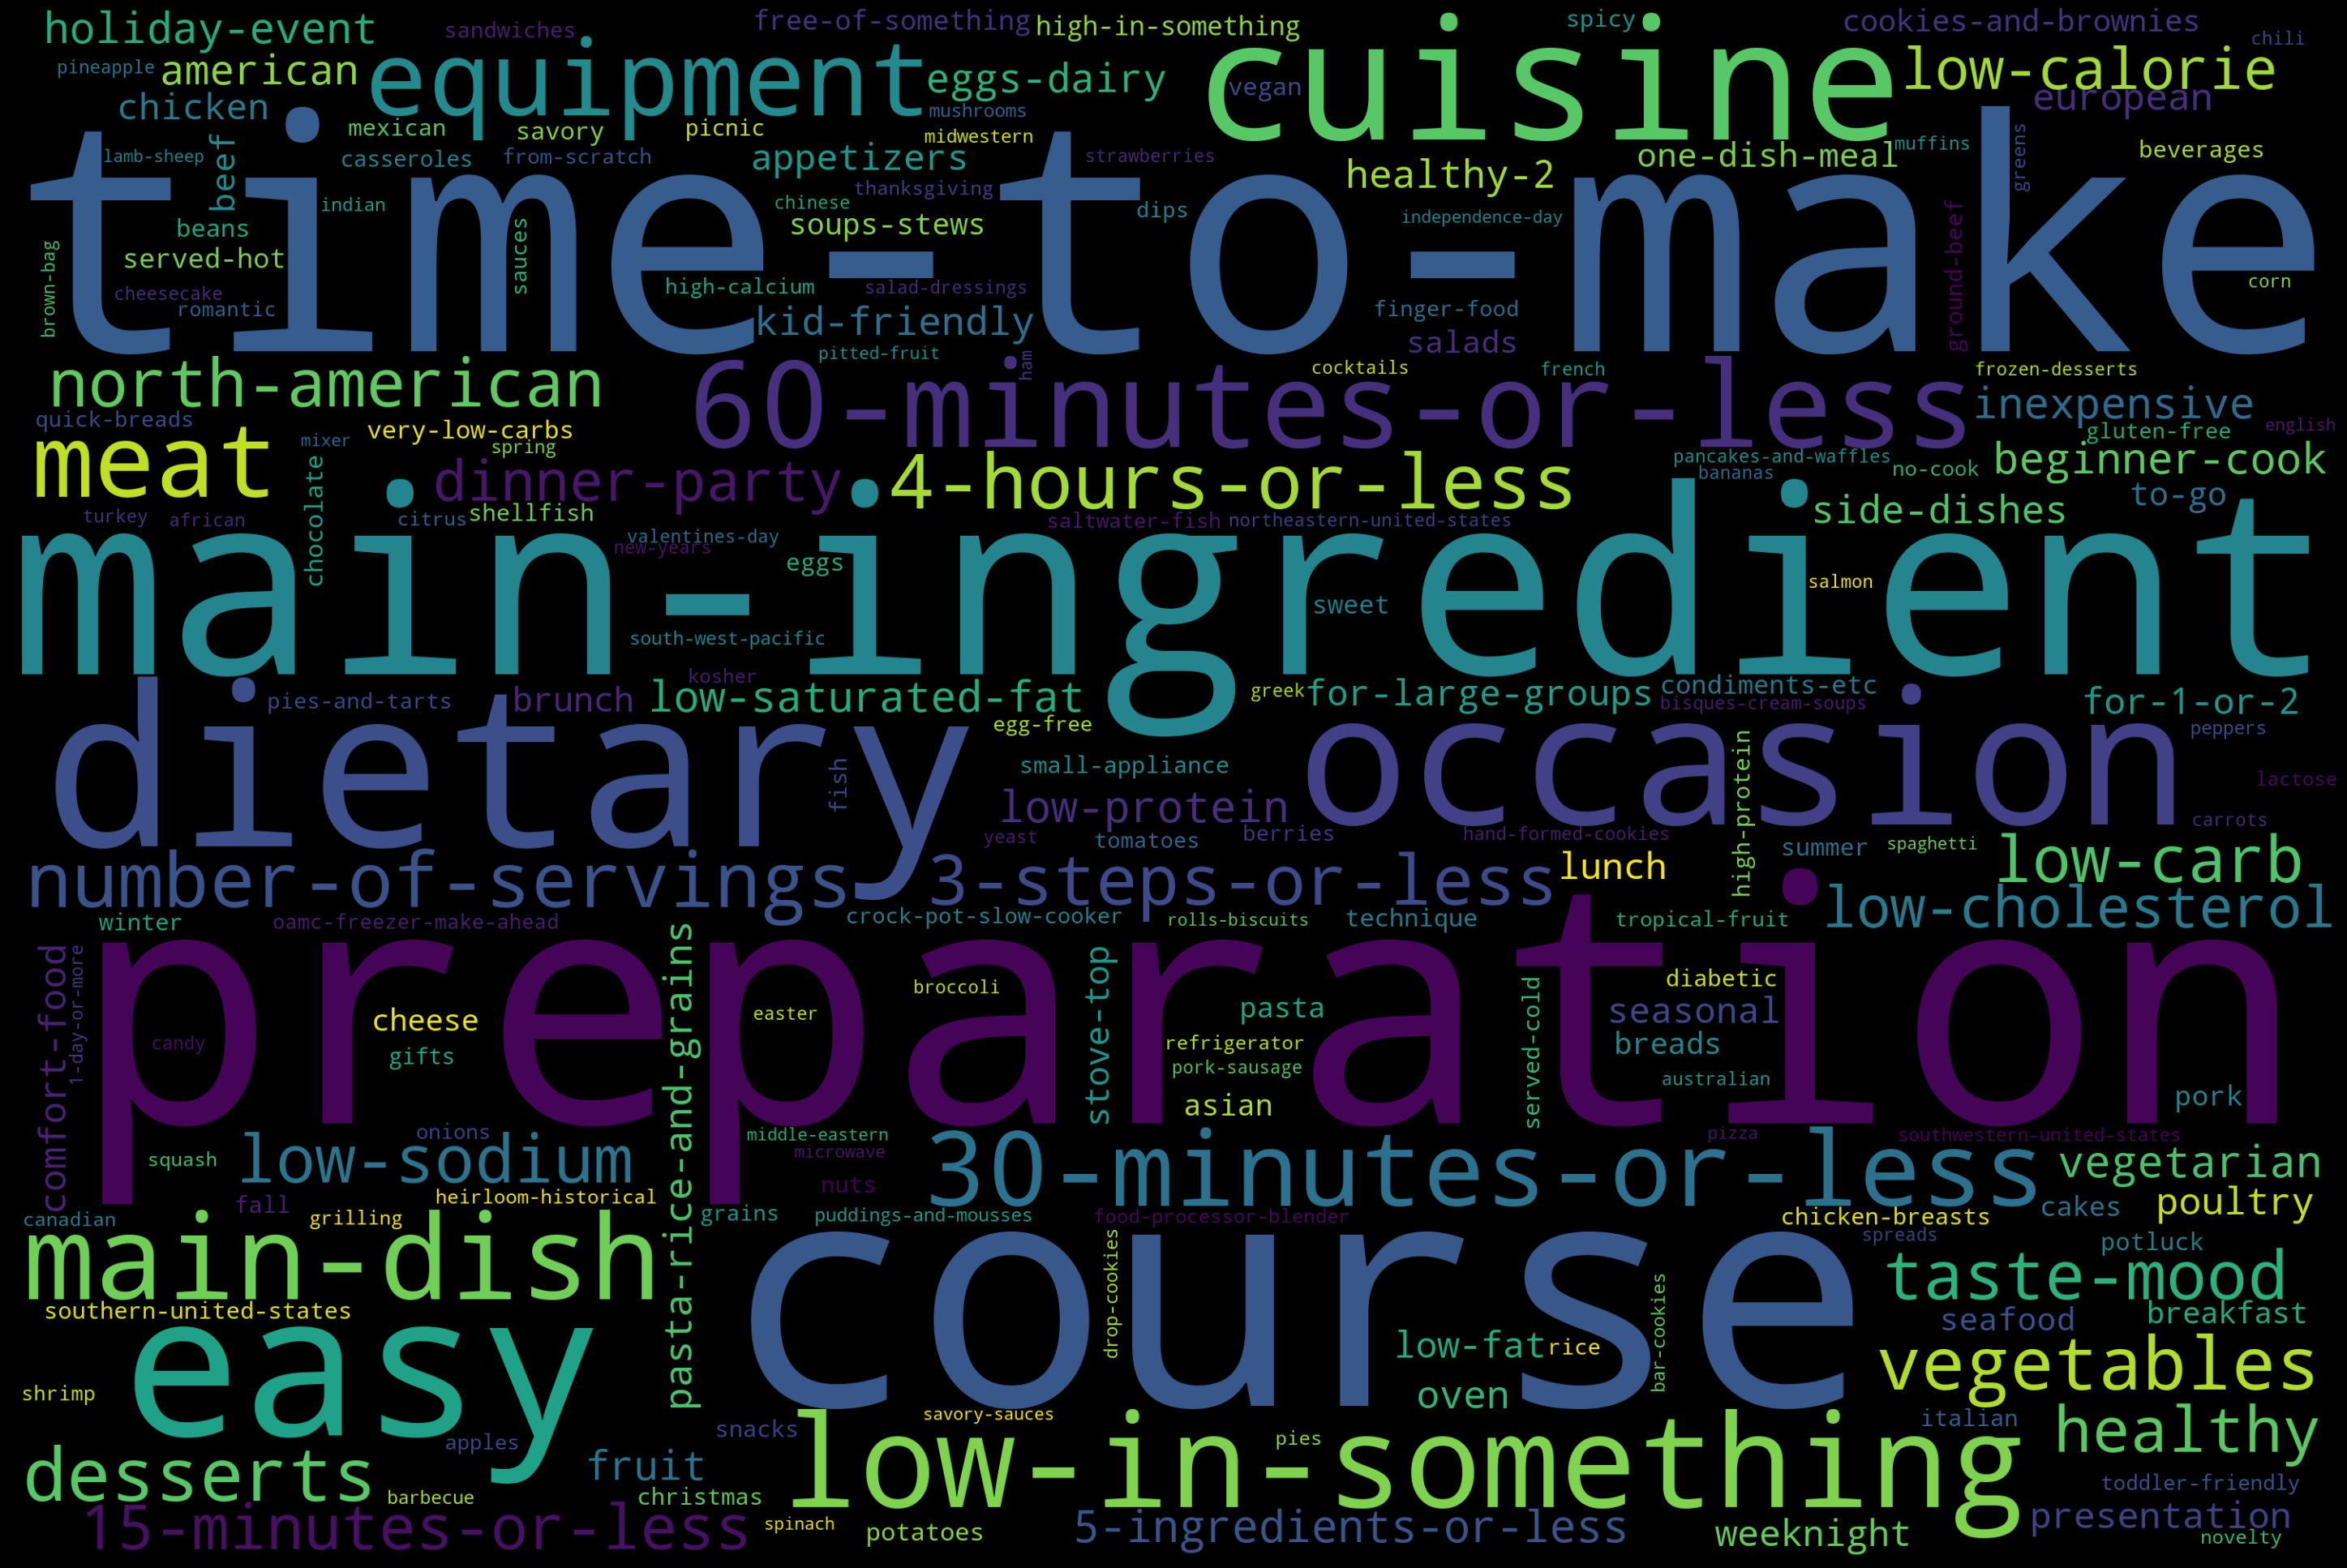

In [23]:
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black').generate_from_frequencies(dict(tag_dist))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [24]:

#function for visualizing the most common tokens within a frequency distribution

def visualize_tokens(freq_dist, number, title):
    '''
    From Phase 4 Project: 
    https://github.com/CGPinDC/Tweet_NLP_Project/blob/main/Tweet_Sentiment_%20Analysis_Notebook.ipynb
    
    Inputs:
    freq_dist: pass in frequency dictionary of tokens. 
    number: number as integer of the top tokens to return
    
    title: title of graph
    '''
    

    # get tokens and frequency counts from freq_dist
    top = list(zip(*freq_dist.most_common(number)))
    tokens = top[0]
    counts = top[1]
    
    print(f'Top Tokens: {tokens[:number]}')

    # Set up plot and plot data
    fig, ax = plt.subplots(figsize = (15, 10))
    ax.bar(tokens, counts)

    # Customize plot appearance
    ax.set_title(title)
    ax.set_ylabel("Count")
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    ax.tick_params(axis="x", rotation=90)

In [25]:
target_tags = ['easy','30-minutes-or-less', '3-steps-or-less', 
               '15-minutes-or-less', 'beginner-cook']
tags_to_remove = ['bath-beauty', 'household-cleaners', 'homeopathy-remedies']

In [26]:
# we'll remove the homeopathic and bath/beauty related recipes by indicating which
# recipes contain the undesirable tags
df['remove'] = df['tags_list'].map(lambda x: any(tag in x for tag in tags_to_remove))
df['remove'].value_counts()

False    482279
True         59
Name: remove, dtype: int64

In [27]:
df = df[df['remove'] != True]
df['remove'].value_counts()

False    482279
Name: remove, dtype: int64

In [28]:
# begin by generating the count of unique search terms
search_term_dist = lists_to_count(df, 'search_terms_list')
type(search_term_dist)

nltk.probability.FreqDist

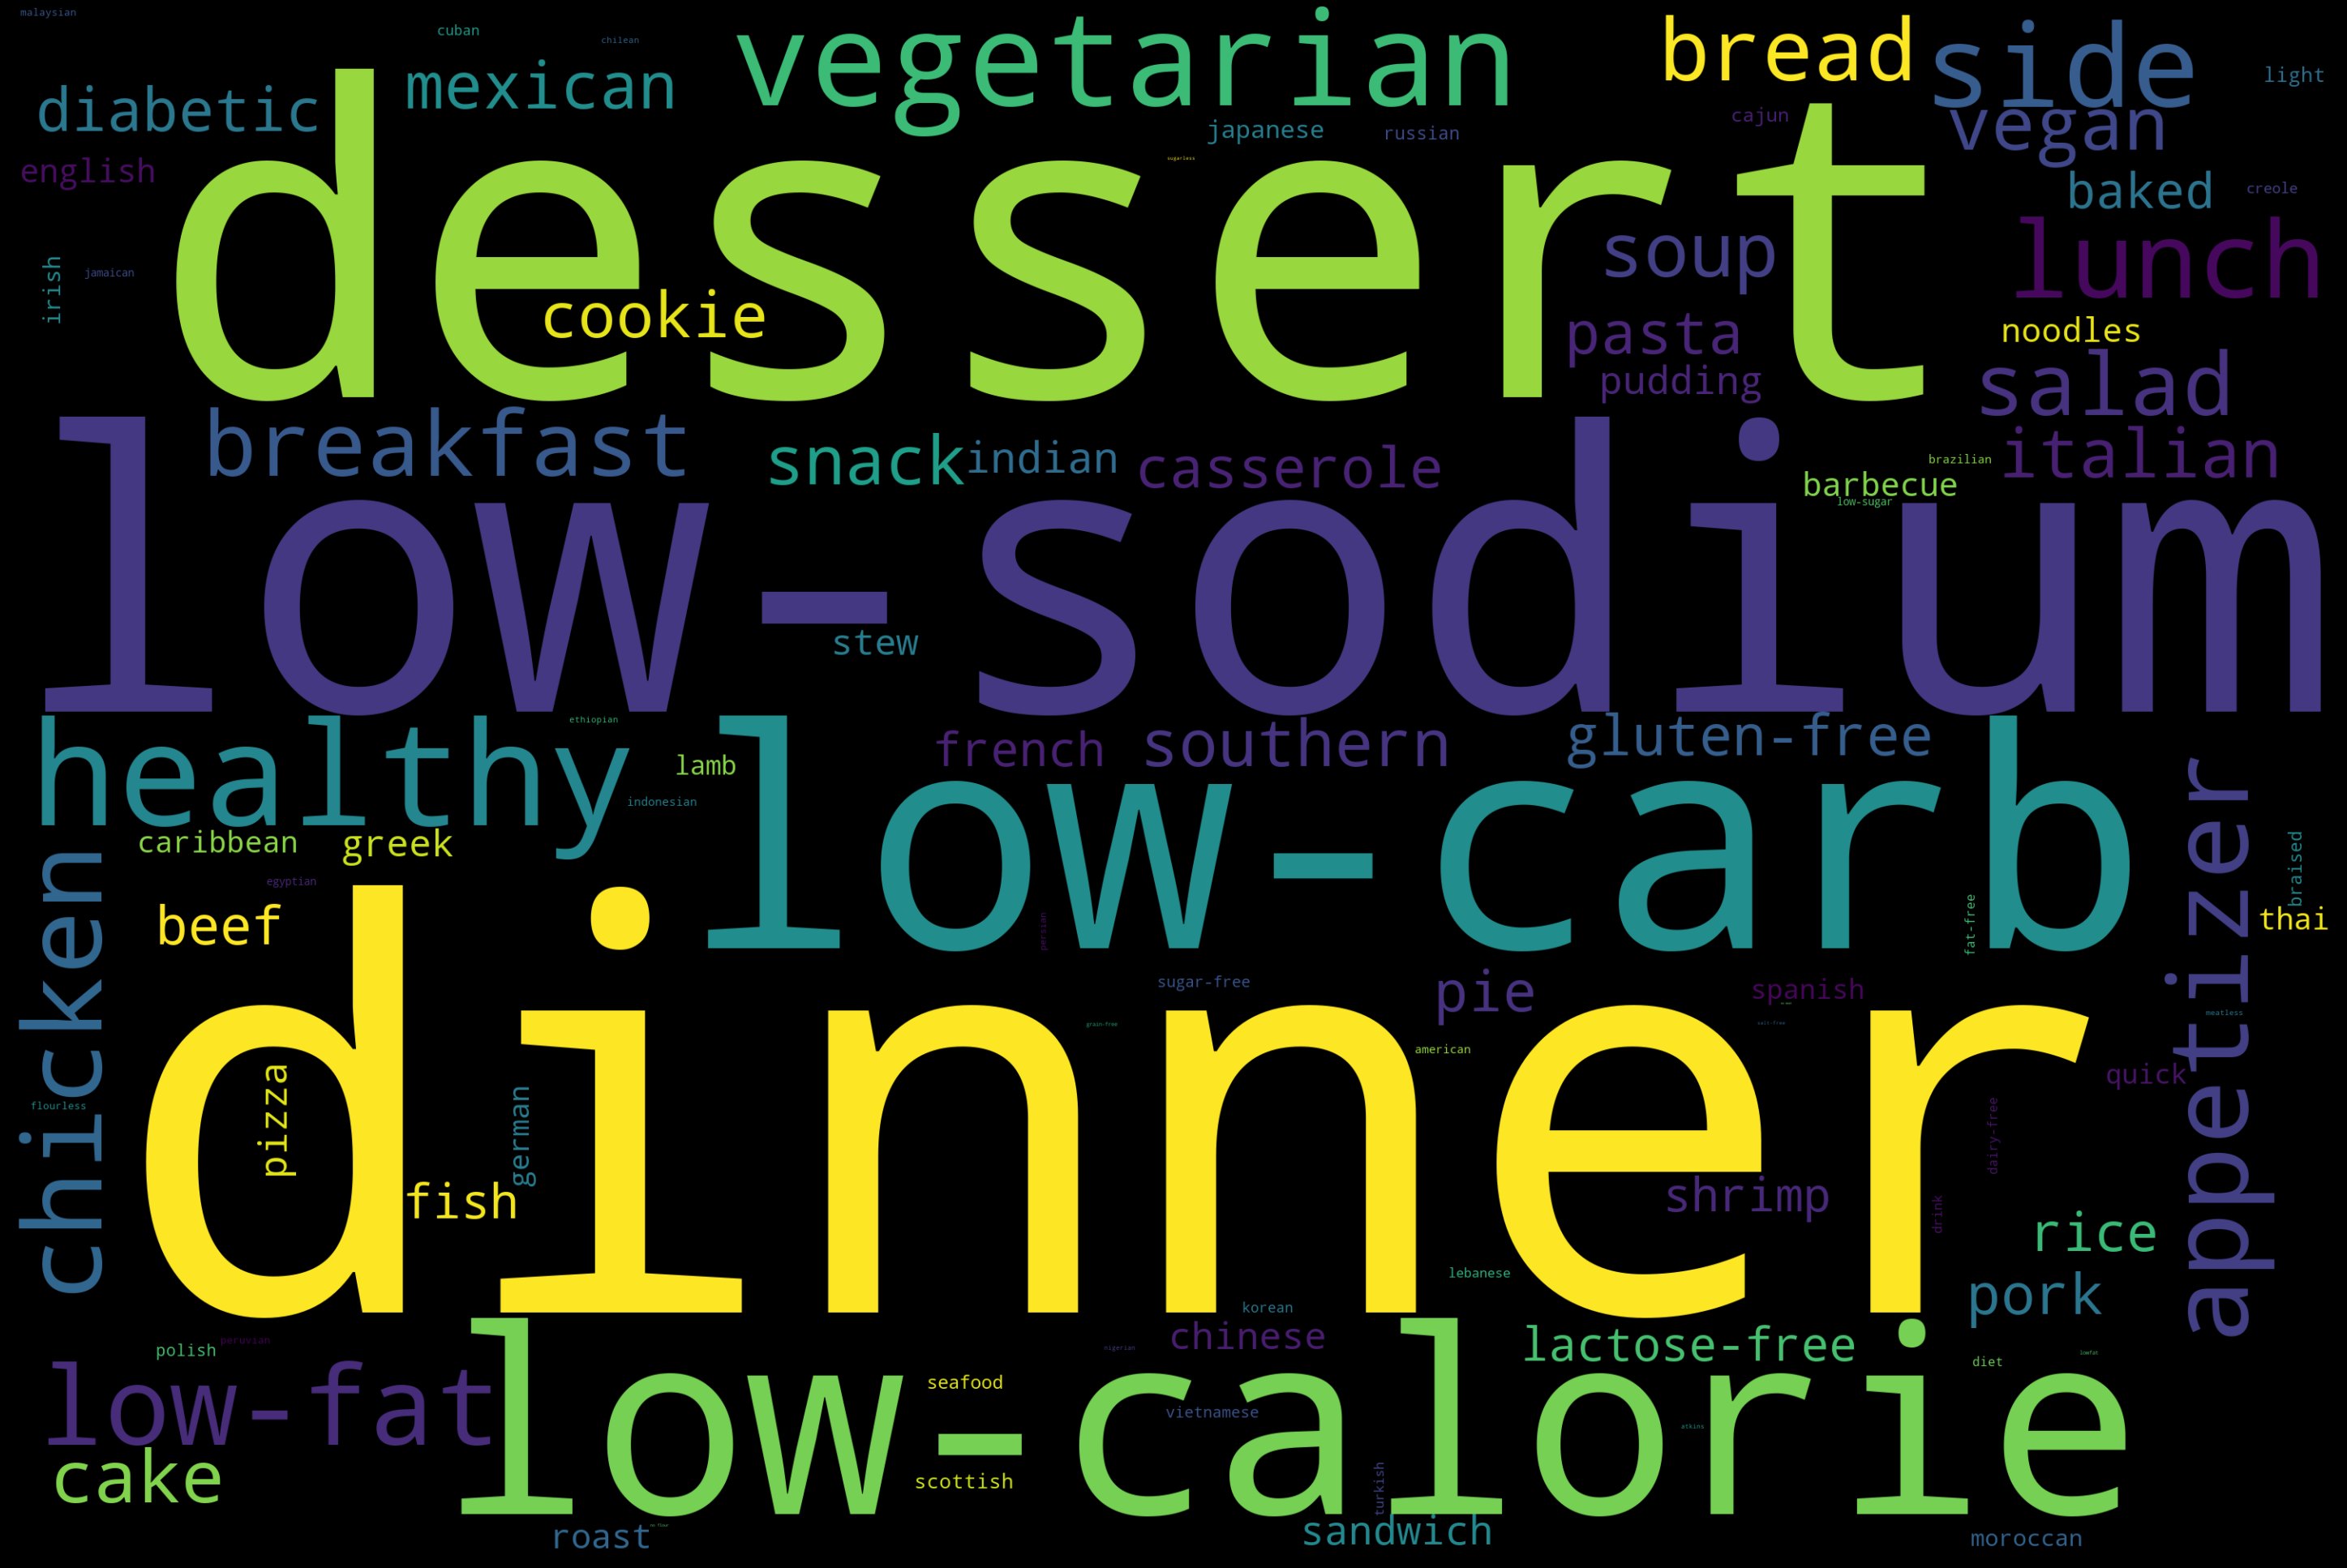

In [29]:
# Wordcloud visalization of count

wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black').generate_from_frequencies(dict(search_term_dist))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [30]:
len(search_term_dist)

98

In [32]:
# creating a list with the search term target label
target_search_term = ['dinner']

### Creating Target Variable

In [33]:
# creating a column indicating if a target tag is present in the 'tags_list' column
df['target_tag'] = df['tags_list'].map(lambda x: any(tag in x for tag in target_tags))
df['target_tag'].value_counts(normalize=True)

True     0.655096
False    0.344904
Name: target_tag, dtype: float64

In [36]:
# small function to relabled the 'target_tag' value for recipes with '60-minutes-or-less' 
# tags
def hour_check(x):
    if '60-minutes-or-less' in x: 
        return False
    else:
        return True

In [37]:
# credit to first response on https://stackoverflow.com/questions/58562662/apply-function-on-subset-of-dataframe-rows-in-column-based-on-value-in-other-col
# for helping me figure out how to re-label the 'target_tag' column
df['target_tag'] = df.apply(lambda row:
    hour_check(row.tags_list) if row.target_tag == True else row.target_tag, axis=1)

In [38]:
df['target_tag'].value_counts(normalize=True)

True     0.515894
False    0.484106
Name: target_tag, dtype: float64

In [39]:
# identifying the recipes with the target search term
df['target_search_term'] = df['search_terms_list'].map(lambda x: any(term in x for term in target_search_term))
df['target_search_term'].value_counts(normalize=True)

False    0.562759
True     0.437241
Name: target_search_term, dtype: float64

In [40]:
def target_check(x):
    ''' dataframe specific function to set rows as meeting the conditions for the 
    target variable or not'''
    if (x['target_tag'] == True) and (x['target_search_term'] == True):
        return 1
    else:
        return 0

In [41]:
df['target'] = df.apply(target_check, axis=1)
df.head()

,id,name,description,ingredients,ingredients_raw_str,serving_size,servings,steps,tags,search_terms,ingredients_list,ingredients_raw_str_list,steps_list,tags_list,search_terms_list,remove,target_tag,target_search_term,target
0,96313,Grilled Garlic Cheese Grits,"We love grits, this is another good way to ser...","['water', 'grits', 'salt', 'cheddar cheese', '...","[""4 cups water"",""1 cup uncooked old f...",1 (155 g),8,"['I a sauce pan, bring water to a boil; slowly...","['time-to-make', 'course', 'main-ingredient', ...","{'diabetic', 'low-calorie', 'vegetarian', 'low...","[water, grits, salt, cheddar cheese, garlic, o...","[4 cups water, 1 cup uncooked old fas...","[I a sauce pan, bring water to a boil; slowly ...","[time-to-make, course, main-ingredient, prepar...","[diabetic, low-calorie, side, low-carb, vegeta...",False,False,False,0
1,232037,Simple Shrimp and Andouille Jambalaya,"Simple, easy and very tasty for when you are i...","['onion', 'red bell pepper', 'garlic cloves', ...","[""1 medium onion, chopped coarse "",""1 m...",1 (366 g),4,"['In a food processor, pulse the onion, red pe...","['60-minutes-or-less', 'time-to-make', 'course...","{'dinner', 'shrimp'}","[onion, red bell pepper, garlic cloves, large ...","[1 medium onion, chopped coarse , 1 med...","[In a food processor, pulse the onion, red pep...","[60-minutes-or-less, time-to-make, course, mai...","[shrimp, dinner]",False,False,True,0
3,60656,Crock Pot Italian Zucchini,This is a good recipe for weight watchers. It ...,"['zucchini', 'yellow squash', 'diced tomatoes'...","[""2 zucchini, sliced "",""2 small yel...",1 (244 g),4,['Put all ingredients in the crock pot and coo...,"['weeknight', 'time-to-make', 'course', 'main-...","{'side', 'vegetarian', 'italian'}","[zucchini, yellow squash, diced tomatoes, onio...","[2 zucchini, sliced , 2 small yello...",[Put all ingredients in the crock pot and cook...,"[weeknight, time-to-make, course, main-ingredi...","[italian, side, vegetarian]",False,True,False,0
4,232047,Beef Stew With Dried Cherries,This is a fabulous stew that came from one of ...,"['beef stew meat', 'flour', 'salt', 'allspice'...","[""3 lbs beef stew meat"",""3 tablespoons ...",1 (358 g),8,"['Preheat oven to 350°F.', ""Cut beef into 1 in...","['time-to-make', 'course', 'main-ingredient', ...",{'dinner'},"[beef stew meat, flour, salt, allspice, cinnam...","[3 lbs beef stew meat, 3 tablespoons ...","[Preheat oven to 350°F., Cut beef into 1 inch ...","[time-to-make, course, main-ingredient, prepar...",[dinner],False,True,True,1
5,232050,Hot Sweet Almond Brittle,This is one of our standard holiday gift recip...,"['slivered almonds', 'cider vinegar', 'sugar',...","[""12 ounces slivered almonds"",""1/4 cup ...",1 (832 g),1,['Preheat oven to 375°F Place almonds in sing...,"['time-to-make', 'course', 'preparation', 'des...",{'dessert'},"[slivered almonds, cider vinegar, sugar, sugar...","[12 ounces slivered almonds, 1/4 cup ...",[Preheat oven to 375°F Place almonds in singl...,"[time-to-make, course, preparation, desserts, ...",[dessert],False,False,False,0


In [43]:
# final clean-up action (for now) 
df.drop(['remove'], axis=1, inplace = True)

In [53]:
import re


In [54]:
def basic_cleaning(df, column):
    ''' Takes in a dataframe and the name of the column to be cleaned.  The contents of the column 
    which need to be strings, are converted to lowercase, have their punctuation and numbers removed,
    and are finally stripped of whitespaces
    
    Input:
    df - dataframe with column to be cleaned
    column - column containing strings
    
    Returns: 
    Dataframe with new, cleaned, column added'''
    new_col = 'cleaned_' +column
    # convert to lowercase
    df[new_col] = df[column].apply(lambda x: x.lower())
    
    # remove punctuation and non-characters
    df[new_col] = df[new_col].apply(lambda x: re.sub(r'[^\w\s]','',x))
    df[new_col] = df[new_col].apply(lambda x: re.sub('[0-9\n]',' ',x))

    #strip whitespace
    df[new_col] = df[new_col].apply(lambda x: re.sub('[ ]{2,}',' ',x))
    
    return df

In [55]:
# cleaning steps column 
df = basic_cleaning(df, 'steps')

In [57]:
# tokenizing steps
df['step_tokens'] = df['cleaned_steps'].apply(lambda x: x.split())
df.head()

,id,name,description,ingredients,ingredients_raw_str,serving_size,servings,steps,tags,search_terms,ingredients_list,ingredients_raw_str_list,steps_list,tags_list,search_terms_list,target_tag,target_search_term,target,num_ingredients,num_steps,num_char_description,cleaned_steps,step_tokens
0,96313,Grilled Garlic Cheese Grits,"We love grits, this is another good way to ser...","['water', 'grits', 'salt', 'cheddar cheese', '...","[""4 cups water"",""1 cup uncooked old f...",1 (155 g),8,"['I a sauce pan, bring water to a boil; slowly...","['time-to-make', 'course', 'main-ingredient', ...","{'diabetic', 'low-calorie', 'vegetarian', 'low...","[water, grits, salt, cheddar cheese, garlic, o...","[4 cups water, 1 cup uncooked old fas...","[I a sauce pan, bring water to a boil; slowly ...","[time-to-make, course, main-ingredient, prepar...","[diabetic, low-calorie, side, low-carb, vegeta...",False,False,0,6,4,301,i a sauce pan bring water to a boil slowly add...,"[i, a, sauce, pan, bring, water, to, a, boil, ..."
1,232037,Simple Shrimp and Andouille Jambalaya,"Simple, easy and very tasty for when you are i...","['onion', 'red bell pepper', 'garlic cloves', ...","[""1 medium onion, chopped coarse "",""1 m...",1 (366 g),4,"['In a food processor, pulse the onion, red pe...","['60-minutes-or-less', 'time-to-make', 'course...","{'dinner', 'shrimp'}","[onion, red bell pepper, garlic cloves, large ...","[1 medium onion, chopped coarse , 1 med...","[In a food processor, pulse the onion, red pep...","[60-minutes-or-less, time-to-make, course, mai...","[shrimp, dinner]",False,True,0,13,10,138,in a food processor pulse the onion red pepper...,"[in, a, food, processor, pulse, the, onion, re..."
3,60656,Crock Pot Italian Zucchini,This is a good recipe for weight watchers. It ...,"['zucchini', 'yellow squash', 'diced tomatoes'...","[""2 zucchini, sliced "",""2 small yel...",1 (244 g),4,['Put all ingredients in the crock pot and coo...,"['weeknight', 'time-to-make', 'course', 'main-...","{'side', 'vegetarian', 'italian'}","[zucchini, yellow squash, diced tomatoes, onio...","[2 zucchini, sliced , 2 small yello...",[Put all ingredients in the crock pot and cook...,"[weeknight, time-to-make, course, main-ingredi...","[italian, side, vegetarian]",True,False,0,9,1,57,put all ingredients in the crock pot and cook ...,"[put, all, ingredients, in, the, crock, pot, a..."
4,232047,Beef Stew With Dried Cherries,This is a fabulous stew that came from one of ...,"['beef stew meat', 'flour', 'salt', 'allspice'...","[""3 lbs beef stew meat"",""3 tablespoons ...",1 (358 g),8,"['Preheat oven to 350°F.', ""Cut beef into 1 in...","['time-to-make', 'course', 'main-ingredient', ...",{'dinner'},"[beef stew meat, flour, salt, allspice, cinnam...","[3 lbs beef stew meat, 3 tablespoons ...","[Preheat oven to 350°F., Cut beef into 1 inch ...","[time-to-make, course, main-ingredient, prepar...",[dinner],True,True,1,14,6,392,preheat oven to f cut beef into inch cubes com...,"[preheat, oven, to, f, cut, beef, into, inch, ..."
5,232050,Hot Sweet Almond Brittle,This is one of our standard holiday gift recip...,"['slivered almonds', 'cider vinegar', 'sugar',...","[""12 ounces slivered almonds"",""1/4 cup ...",1 (832 g),1,['Preheat oven to 375°F Place almonds in sing...,"['time-to-make', 'course', 'preparation', 'des...",{'dessert'},"[slivered almonds, cider vinegar, sugar, sugar...","[12 ounces slivered almonds, 1/4 cup ...",[Preheat oven to 375°F Place almonds in singl...,"[time-to-make, course, preparation, desserts, ...",[dessert],False,False,0,8,4,164,preheat oven to f place almonds in single laye...,"[preheat, oven, to, f, place, almonds, in, sin..."


In [79]:
from nltk.corpus import stopwords

In [84]:
# cleaning and tokenizing 'description'
df = basic_cleaning(df, 'description')
df['description_tokens'] = df['cleaned_description'].apply(lambda x: x.split())
df.head()

,id,name,description,ingredients,ingredients_raw_str,serving_size,servings,steps,tags,search_terms,ingredients_list,ingredients_raw_str_list,steps_list,tags_list,search_terms_list,target_tag,target_search_term,target,num_ingredients,num_steps,num_char_description,cleaned_steps,step_tokens,cleaned_description,description_tokens
0,96313,Grilled Garlic Cheese Grits,"We love grits, this is another good way to ser...","['water', 'grits', 'salt', 'cheddar cheese', '...","[""4 cups water"",""1 cup uncooked old f...",1 (155 g),8,"['I a sauce pan, bring water to a boil; slowly...","['time-to-make', 'course', 'main-ingredient', ...","{'diabetic', 'low-calorie', 'vegetarian', 'low...","[water, grits, salt, cheddar cheese, garlic, o...","[4 cups water, 1 cup uncooked old fas...","[I a sauce pan, bring water to a boil; slowly ...","[time-to-make, course, main-ingredient, prepar...","[low-calorie, diabetic, side, vegetarian, low-...",False,False,0,6,4,301,i a sauce pan bring water to a boil slowly add...,"[i, a, sauce, pan, bring, water, to, a, boil, ...",we love grits this is another good way to serv...,"[we, love, grits, this, is, another, good, way..."
1,232037,Simple Shrimp and Andouille Jambalaya,"Simple, easy and very tasty for when you are i...","['onion', 'red bell pepper', 'garlic cloves', ...","[""1 medium onion, chopped coarse "",""1 m...",1 (366 g),4,"['In a food processor, pulse the onion, red pe...","['60-minutes-or-less', 'time-to-make', 'course...","{'dinner', 'shrimp'}","[onion, red bell pepper, garlic cloves, large ...","[1 medium onion, chopped coarse , 1 med...","[In a food processor, pulse the onion, red pep...","[60-minutes-or-less, time-to-make, course, mai...","[dinner, shrimp]",False,True,0,13,10,138,in a food processor pulse the onion red pepper...,"[in, a, food, processor, pulse, the, onion, re...",simple easy and very tasty for when you are in...,"[simple, easy, and, very, tasty, for, when, yo..."
3,60656,Crock Pot Italian Zucchini,This is a good recipe for weight watchers. It ...,"['zucchini', 'yellow squash', 'diced tomatoes'...","[""2 zucchini, sliced "",""2 small yel...",1 (244 g),4,['Put all ingredients in the crock pot and coo...,"['weeknight', 'time-to-make', 'course', 'main-...","{'side', 'vegetarian', 'italian'}","[zucchini, yellow squash, diced tomatoes, onio...","[2 zucchini, sliced , 2 small yello...",[Put all ingredients in the crock pot and cook...,"[weeknight, time-to-make, course, main-ingredi...","[vegetarian, italian, side]",True,False,0,9,1,57,put all ingredients in the crock pot and cook ...,"[put, all, ingredients, in, the, crock, pot, a...",this is a good recipe for weight watchers it i...,"[this, is, a, good, recipe, for, weight, watch..."
4,232047,Beef Stew With Dried Cherries,This is a fabulous stew that came from one of ...,"['beef stew meat', 'flour', 'salt', 'allspice'...","[""3 lbs beef stew meat"",""3 tablespoons ...",1 (358 g),8,"['Preheat oven to 350°F.', ""Cut beef into 1 in...","['time-to-make', 'course', 'main-ingredient', ...",{'dinner'},"[beef stew meat, flour, salt, allspice, cinnam...","[3 lbs beef stew meat, 3 tablespoons ...","[Preheat oven to 350°F., Cut beef into 1 inch ...","[time-to-make, course, main-ingredient, prepar...",[dinner],True,True,1,14,6,392,preheat oven to f cut beef into inch cubes com...,"[preheat, oven, to, f, cut, beef, into, inch, ...",this is a fabulous stew that came from one of ...,"[this, is, a, fabulous, stew, that, came, from..."
5,232050,Hot Sweet Almond Brittle,This is one of our standard holiday gift recip...,"['slivered almonds', 'cider vinegar', 'sugar',...","[""12 ounces slivered almonds"",""1/4 cup ...",1 (832 g),1,['Preheat oven to 375°F Place almonds in sing...,"['time-to-make', 'course', 'preparation', 'des...",{'dessert'},"[slivered almonds, cider vinegar, sugar, sugar...","[12 ounces slivered almonds, 1/4 cup ...",[Preheat oven to 375°F Place almonds in singl...,"[time-to-make, course, preparation, desserts, ...",[dessert],False,Fals

In [85]:
# getting word count
description_count = lists_to_count(df, 'description_tokens', series = True).sort_values(ascending=False)

In [62]:


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, plot_confusion_matrix, plot_roc_curve, accuracy_score, precision_score, recall_score, f1_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from imblearn.under_sampling import RandomUnderSampler


In [63]:
def evaluate(estimator, X_tr, X_te, y_tr, y_te, cv=5):
    '''
Function takes in estimator, training data, test data, 
and the cross validation splitting strategy, and returns the accuracy, precision, recall, f1 and the ROC-AUC
scores for the model as well as a confusion matrix visualization.  From Phase 3 Project: 
https://github.com/Nindorph/TanzanianWaterWells/blob/main/Modeling_Final.ipynb and Lindsey Berlin’s evaluate function
found at: 
https://github.com/lindseyberlin/Cat-in-the-Dat-Project/blob/main/notebooks/Lindsey/EDA-Initial-Models.ipynb
------------------------------------------------------------------------------------------
Inputs: 
-Estimator - Estimator object  
-X_tr – X_train dataframe
-X_te – X_test dataframe
-Y_tr – y_train dataframe
-Y_te – y_test dataframe
-Cv – If cross_val  set to true this determines the cross-validation splitting strategy.  
        Takes in all value options for sklearn.model_selection_cross_val_score “cv” parameter:
        - None, to use the default 5-fold cross validation,
        - int, to specify the number of folds in a (Stratified)KFold,
        - CV splitter,
        - An iterable yielding (train, test) splits as arrays of indices


Returns – nothing is returned 


    '''
    #If no grid search is being performed, go through evaluation steps as normal, including cross validation
    #Cross-Validate
    output = cross_validate(estimator, X_tr, y_tr, cv=cv,
                            scoring=['accuracy', 'precision','recall', 'f1', 'roc_auc'])
    #Printing out the mean of all of our evaluating metrics across the cross validation. 
    #Accuracy, precisionc recall, f1, and roc auc
    print('Results of Cross-Validation:\n')
    print(f'Average accuracy: {output["test_accuracy"].mean()}\
    +/- {output["test_accuracy"].std()}')
    print(f'Average precision: {output["test_precision"].mean()}\
    +/- {output["test_precision"].std()}')
    print(f'**Average recall: {output["test_recall"].mean()}\
    +/- {output["test_recall"].std()}')
    print(f'Average f1 score: {output["test_f1"].mean()}\
    +/- {output["test_f1"].std()}')
    print(f'Average roc_auc: {output["test_roc_auc"].mean()}\
    +/- {output["test_roc_auc"].std()}\n')
    print('+'*20)
    
        
    #Fitting the estimator to our X and y train data
    estimator.fit(X_tr, y_tr)
    #getting predictions for X train
    tr_preds = estimator.predict(X_tr)
    #getting predictions for X test
    te_preds = estimator.predict(X_te)
        
    #Creating a confusion matrix from our data with custom labels
    print('\nResults of Train-Test Split Validation:')
    plot_confusion_matrix(estimator, X_te, y_te, cmap='mako')
    plt.show()
        
    #Printing our final evaluating metrics across X train
    #Evaluating using accuracy, precision, recall, f1, roc auc
    print("\nTraining Scores:")
    print(f"Train accuracy: {accuracy_score(y_tr, tr_preds)}")
    print(f"Train precision: {precision_score(y_tr, tr_preds)}")
    print(f"**Train recall: {recall_score(y_tr, tr_preds)}")
    print(f"Train f1 score: {f1_score(y_tr, tr_preds)}")
    print(f"Train roc_auc: {roc_auc_score(y_tr, tr_preds)}\n")
    print("<>"*10)
    #Printing our final evaluating metrics across X test
    #Evaluating using accuracy, precision, recall, f1, roc auc
    print("\nTesting Scores:")
    print(f"Test accuracy: {accuracy_score(y_te, te_preds)}")
    print(f"Test precision: {precision_score(y_te, te_preds)}")
    print(f"**Test recall: {recall_score(y_te, te_preds)}")
    print(f"Test f1 score: {f1_score(y_te, te_preds)}")
    print(f"Test roc_auc: {roc_auc_score(y_te, te_preds)}")


In [66]:
# creating a dataframe with the text that will be used in the model as well as the target
df_strings = df[['ingredients','description','steps','target']]
df_strings.head()

,ingredients,description,steps,target
0,"['water', 'grits', 'salt', 'cheddar cheese', '...","We love grits, this is another good way to ser...","['I a sauce pan, bring water to a boil; slowly...",0
1,"['onion', 'red bell pepper', 'garlic cloves', ...","Simple, easy and very tasty for when you are i...","['In a food processor, pulse the onion, red pe...",0
3,"['zucchini', 'yellow squash', 'diced tomatoes'...",This is a good recipe for weight watchers. It ...,['Put all ingredients in the crock pot and coo...,0
4,"['beef stew meat', 'flour', 'salt', 'allspice'...",This is a fabulous stew that came from one of ...,"['Preheat oven to 350°F.', ""Cut beef into 1 in...",1
5,"['slivered almonds', 'cider vinegar', 'sugar',...",This is one of our standard holiday gift recip...,['Preheat oven to 375°F Place almonds in sing...,0


In [67]:
df_strings['steps'].iloc[0]

"['I a sauce pan, bring water to a boil; slowly add grits and salt, stirring constantly; Reduce heat:simmer, uncovered, for 40-45 minutes or untill thickened, stirrin occasionally.', 'Add cheese and garlic; stir until cheese is melted, Spray 9-inch baking dish with nonstick cooking spray; Cover and refrigerate for 2 to 2 1/2 hours or until frim.', 'Before starting the grill, coat the grill rack with nonstick cooking spray; Cut the grits into 3-inch squares; Brush both sides with olive oil.', 'Grill, covered, over medium heat for 4 to 6 minutes on each side or until lightly browned.']"

In [68]:
df_strings.to_csv('data/df_strings.csv')